In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Data Handling and Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
import seaborn as sns
from pylab import rcParams
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import plotly.express as px
import os


# Data Preprocessing
from sklearn import preprocessing
#from feature_engine import imputation
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from scipy.stats import skew


# Exploratory Data Analysis
#from pandas_profiling import ProfileReport


# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier



# Model Evaluation and Metrics
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_auc_score, roc_curve
#from yellowbrick.classifier import ClassificationReport, ROCAUC
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE


# Deployment and Monitoring
#import docker

# Saving Model
from joblib import dump
import pickle


#Other libraries
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cap/Train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cap/Test.csv')

In [4]:
train_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [6]:
train_df.isnull().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [7]:
for column in train_df.columns:
  print(column, ':', train_df[column].nunique())

user_id : 1077024
REGION : 14
TENURE : 8
MONTANT : 4357
FREQUENCE_RECH : 119
REVENUE : 31810
ARPU_SEGMENT : 14062
FREQUENCE : 91
DATA_VOLUME : 32459
ON_NET : 8202
ORANGE : 2674
TIGO : 1105
ZONE1 : 482
ZONE2 : 394
MRG : 1
REGULARITY : 62
TOP_PACK : 126
FREQ_TOP_PACK : 206
CHURN : 2


In [8]:
train_df.shape

(1077024, 19)

In [9]:
train_df = train_df.drop('user_id', axis = 1)
train_df

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,16,NaN,NaN,0
1077020,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.0,833.0,5.0,0.0,15.0,77.0,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.0,0
1077021,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,1
1077022,NaN,K > 24 month,600.0,1.0,600.0,200.0,1.0,591.0,11.0,37.0,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.0,0


In [10]:
# all nan values are to be filled with median on the
train_df['MONTANT'] = train_df['MONTANT'].fillna(train_df['MONTANT'].median())
train_df['FREQUENCE_RECH'] = train_df['FREQUENCE_RECH'].fillna(train_df['FREQUENCE_RECH'].median())
train_df['REVENUE'] = train_df['REVENUE'].fillna(train_df['REVENUE'].median())
train_df['ARPU_SEGMENT'] = train_df['ARPU_SEGMENT'].fillna(train_df['ARPU_SEGMENT'].median())
train_df['FREQUENCE'] = train_df['FREQUENCE'].fillna(train_df['FREQUENCE'].median())
train_df['DATA_VOLUME'] = train_df['DATA_VOLUME'].fillna(train_df['DATA_VOLUME'].median())
train_df['ON_NET'] = train_df['ON_NET'].fillna(train_df['ON_NET'].median())
train_df['ORANGE'] = train_df['ORANGE'].fillna(train_df['ORANGE'].median())
train_df['TIGO'] = train_df['TIGO'].fillna(train_df['TIGO'].median())
train_df['ZONE1'] = train_df['ZONE1'].fillna(train_df['ZONE1'].median())
train_df['ZONE2'] = train_df['ZONE2'].fillna(train_df['ZONE2'].median())
train_df['TOP_PACK']=train_df['TOP_PACK'].replace(np.nan ,train_df['TOP_PACK'].mode()[0])
train_df['REGION']=train_df['REGION'].replace(np.nan ,train_df['REGION'].mode()[0])
train_df['TENURE']=train_df['TENURE'].replace("nan" ,train_df['TENURE'].mode()[0])
train_df['FREQ_TOP_PACK'] = train_df['FREQ_TOP_PACK'].fillna(train_df['FREQ_TOP_PACK'].median())
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   REGION          1077024 non-null  object 
 1   TENURE          1077024 non-null  object 
 2   MONTANT         1077024 non-null  float64
 3   FREQUENCE_RECH  1077024 non-null  float64
 4   REVENUE         1077024 non-null  float64
 5   ARPU_SEGMENT    1077024 non-null  float64
 6   FREQUENCE       1077024 non-null  float64
 7   DATA_VOLUME     1077024 non-null  float64
 8   ON_NET          1077024 non-null  float64
 9   ORANGE          1077024 non-null  float64
 10  TIGO            1077024 non-null  float64
 11  ZONE1           1077024 non-null  float64
 12  ZONE2           1077024 non-null  float64
 13  MRG             1077024 non-null  object 
 14  REGULARITY      1077024 non-null  int64  
 15  TOP_PACK        1077024 non-null  object 
 16  FREQ_TOP_PACK   1077024 non-null  fl

In [11]:
train_df.drop('TOP_PACK',axis= 1, inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   REGION          1077024 non-null  object 
 1   TENURE          1077024 non-null  object 
 2   MONTANT         1077024 non-null  float64
 3   FREQUENCE_RECH  1077024 non-null  float64
 4   REVENUE         1077024 non-null  float64
 5   ARPU_SEGMENT    1077024 non-null  float64
 6   FREQUENCE       1077024 non-null  float64
 7   DATA_VOLUME     1077024 non-null  float64
 8   ON_NET          1077024 non-null  float64
 9   ORANGE          1077024 non-null  float64
 10  TIGO            1077024 non-null  float64
 11  ZONE1           1077024 non-null  float64
 12  ZONE2           1077024 non-null  float64
 13  MRG             1077024 non-null  object 
 14  REGULARITY      1077024 non-null  int64  
 15  FREQ_TOP_PACK   1077024 non-null  float64
 16  CHURN           1077024 non-null  in

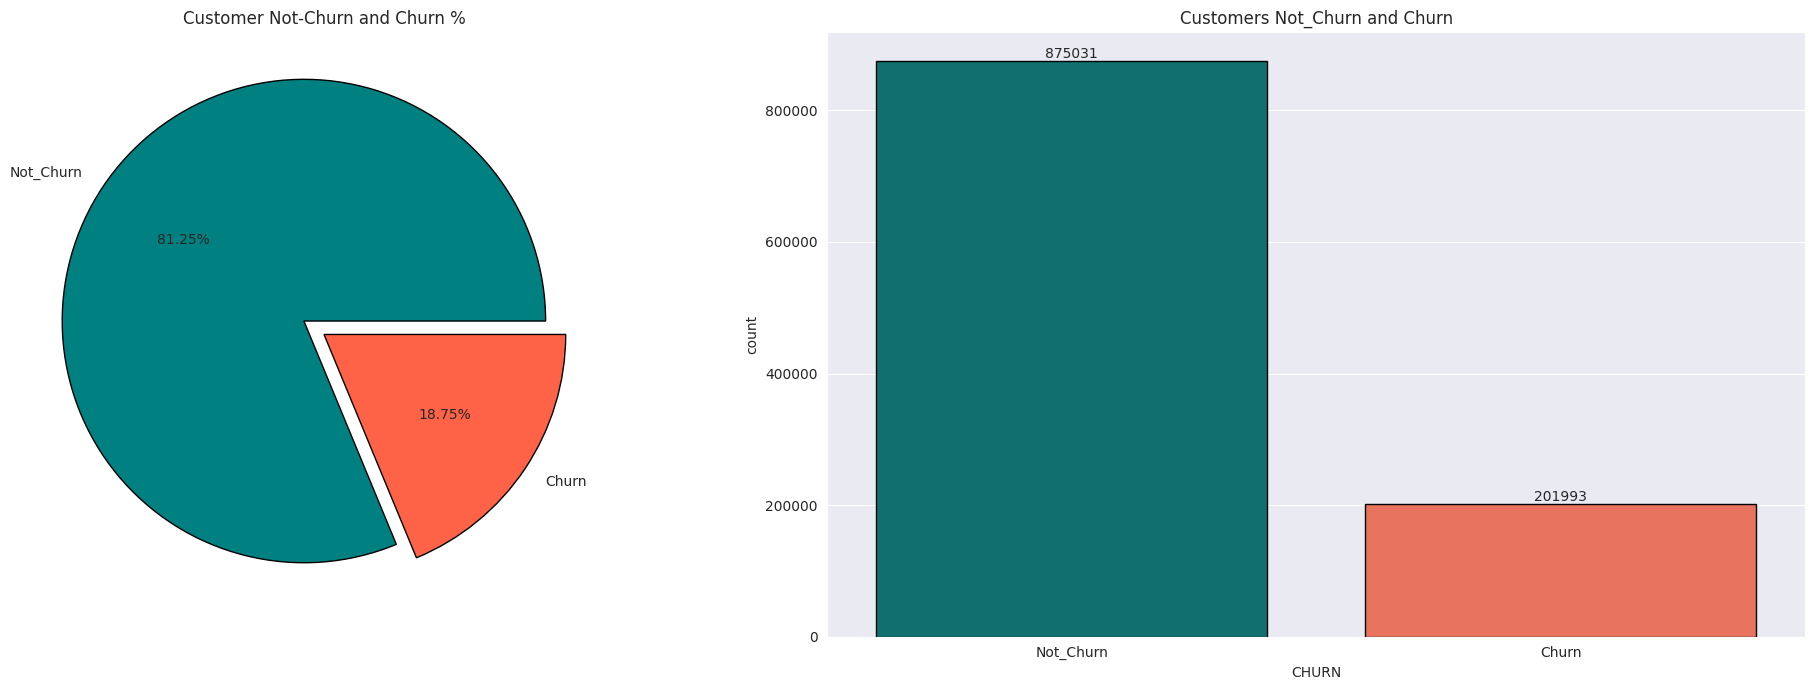

In [12]:
# Define colors for the plots
palette = ['#008080', '#FF6347', '#E50000', '#D2691E']

# Calculate the percentage of positive and negative values
churn_distribute = train_df['CHURN'].value_counts()
plot_pie = [churn_distribute[0] / churn_distribute.sum() * 100, churn_distribute[1] / churn_distribute.sum() * 100]

# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Plot the pie chart on the first subplot
axes[0].pie(plot_pie, labels=['Not_Churn', 'Churn'], autopct='%1.2f%%', explode=(0.1, 0),
            colors=palette[:2], wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[0].set_title('Customer Not-Churn and Churn %')

# Plot the countplot on the second subplot
sns.countplot(data=train_df, x='CHURN', palette=palette[:2], edgecolor='black', ax=axes[1])
axes[1].set_xticklabels(['Not_Churn', 'Churn'])
axes[1].set_title('Customers Not_Churn and Churn')

# Add labels to the countplot bars
for container in axes[1].containers:
    axes[1].bar_label(container)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

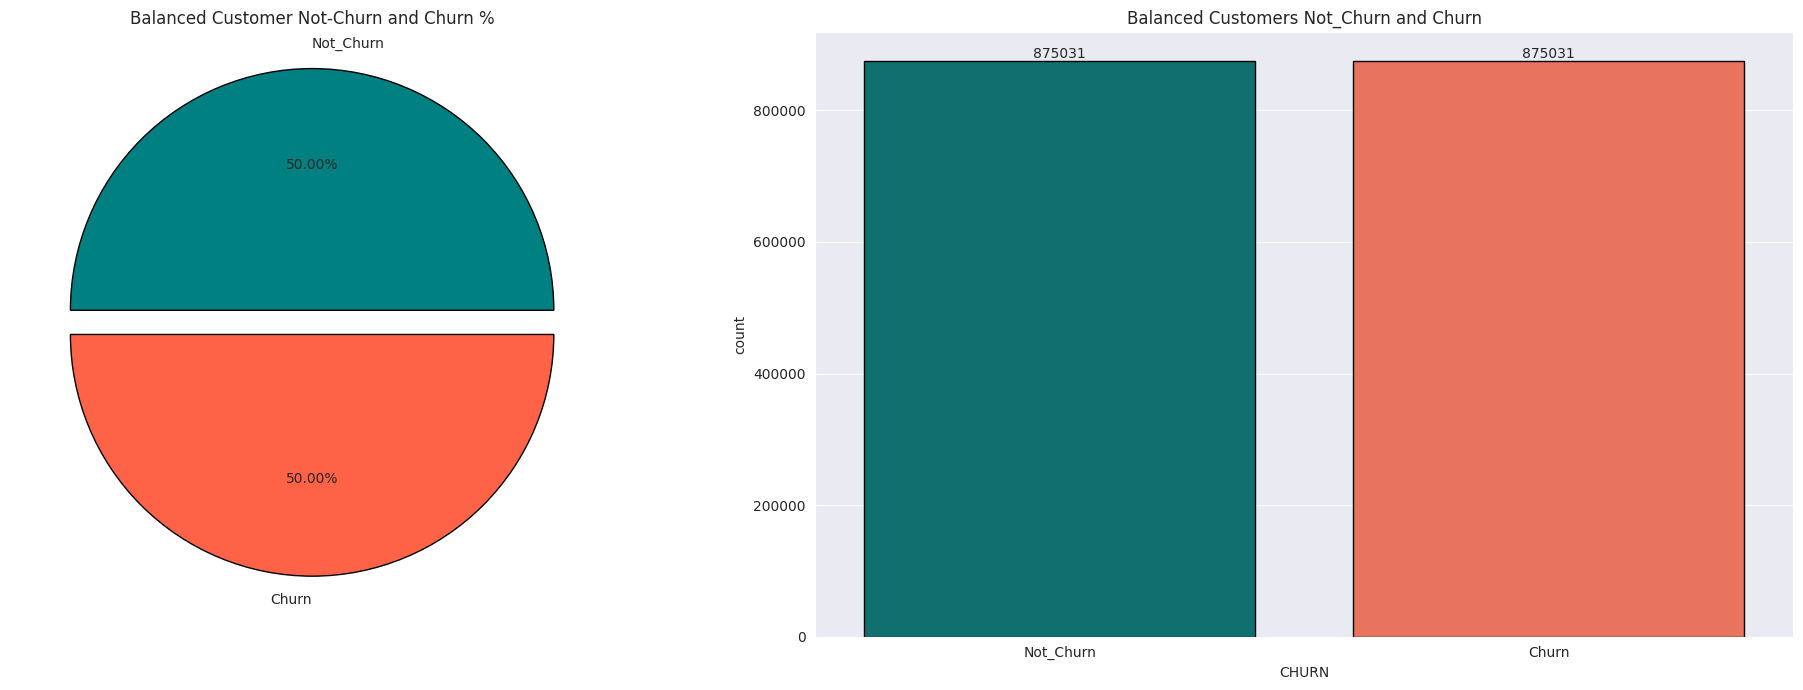

In [13]:
# Separate the features and target variable
X = train_df.drop('CHURN', axis=1)
y = train_df['CHURN']

# Perform oversampling
oversampler = RandomOverSampler(random_state=42)
X_balanced, y_balanced = oversampler.fit_resample(X, y)

# Create a new DataFrame with balanced data
df_balanced = pd.concat([X_balanced, y_balanced], axis=1)

# Calculate the percentage of positive and negative values in the balanced dataset
churn_distribute_balanced = df_balanced['CHURN'].value_counts()
plot_pie_balanced = [
    churn_distribute_balanced[0] / churn_distribute_balanced.sum() * 100,
    churn_distribute_balanced[1] / churn_distribute_balanced.sum() * 100
]

# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Plot the pie chart on the first subplot
axes[0].pie(
    plot_pie_balanced,
    labels=['Not_Churn', 'Churn'],
    autopct='%1.2f%%',
    explode=(0.1, 0),
    colors=palette[:2],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
axes[0].set_title('Balanced Customer Not-Churn and Churn %')

# Plot the countplot on the second subplot
sns.countplot(data=df_balanced, x='CHURN', palette=palette[:2], edgecolor='black', ax=axes[1])
axes[1].set_xticklabels(['Not_Churn', 'Churn'])
axes[1].set_title('Balanced Customers Not_Churn and Churn')

# Add labels to the countplot bars
for container in axes[1].containers:
    axes[1].bar_label(container)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [14]:
def count_duplicate_rows(data):
  """Count the number of duplicate rows in a Pandas DataFrame.
    data: The Pandas DataFrame to check for duplicate rows.
  Returns: The number of duplicate rows in the DataFrame.
  """
  duplicate_rows = data.duplicated()
  return duplicate_rows.sum()

In [15]:
count_duplicate_rows(df_balanced)


990779

In [16]:
# Drop duplicate rows
df_balanced.drop_duplicates()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,FREQ_TOP_PACK,CHURN
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,1.0,2.0,NO,62,30.0,0
1,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,258.0,27.0,29.0,6.0,1.0,2.0,NO,3,5.0,0
2,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,258.0,27.0,29.0,6.0,1.0,2.0,NO,1,5.0,0
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,1.0,2.0,NO,61,7.0,0
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,1.0,2.0,NO,56,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077016,DAKAR,K > 24 month,14800.0,34.0,16189.0,5396.0,38.0,17112.0,32.0,142.0,13.0,7.0,2.0,NO,62,15.0,0
1077017,DAKAR,K > 24 month,2800.0,9.0,2950.0,983.0,9.0,258.0,19.0,42.0,0.0,1.0,2.0,NO,46,3.0,0
1077020,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.0,833.0,5.0,0.0,15.0,77.0,6.0,1.0,2.0,NO,34,2.0,0
1077022,DAKAR,K > 24 month,600.0,1.0,600.0,200.0,1.0,591.0,11.0,37.0,5.0,1.0,2.0,NO,16,1.0,0


In [17]:
count_duplicate_rows(test_df)

0

In [18]:
#import pandas as pd
#from sklearn.model_selection import train_test_split

# Load your original dataset
#original_df = pd.read_csv('your_original_dataset.csv')

# Specify the column you want to use for stratified sampling
stratify_column = 'REGION'

# Split the dataset into a training set and a subset based on the 'REGION' column
train_df, subset_df = train_test_split(df_balanced, test_size=0.1, stratify=df_balanced[stratify_column], random_state=42)

# 'subset_df' now contains a statistically representative subset of your original dataset


In [19]:
subset_df.shape

(175007, 17)

In [20]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175007 entries, 158780 to 1279365
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   REGION          175007 non-null  object 
 1   TENURE          175007 non-null  object 
 2   MONTANT         175007 non-null  float64
 3   FREQUENCE_RECH  175007 non-null  float64
 4   REVENUE         175007 non-null  float64
 5   ARPU_SEGMENT    175007 non-null  float64
 6   FREQUENCE       175007 non-null  float64
 7   DATA_VOLUME     175007 non-null  float64
 8   ON_NET          175007 non-null  float64
 9   ORANGE          175007 non-null  float64
 10  TIGO            175007 non-null  float64
 11  ZONE1           175007 non-null  float64
 12  ZONE2           175007 non-null  float64
 13  MRG             175007 non-null  object 
 14  REGULARITY      175007 non-null  int64  
 15  FREQ_TOP_PACK   175007 non-null  float64
 16  CHURN           175007 non-null  int64  
dtypes: f

In [21]:
# Split subset_df to train and Test


# Create the feature dataframe using the selected columns
X = subset_df.iloc[:, :-1]

# Get the target variable
y = subset_df.iloc[:, -1:]

# Split the data into training and testing sets
X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and validation sets
print("X_sub_train shape:", X_sub_train.shape)
print("y_sub_train shape:", y_sub_train.shape)
print("X_sub_test shape:", X_sub_test.shape)
print("y_sub_test shape:", y_sub_test.shape)

X_sub_train shape: (140005, 16)
y_sub_train shape: (140005, 1)
X_sub_test shape: (35002, 16)
y_sub_test shape: (35002, 1)


In [22]:
# Define preprocessing steps for numerical and categorical features
numerical_features = X_sub_train.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_features = X_sub_train.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # You can change the imputation strategy as needed
    ('scaler', StandardScaler())
  ])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
        ])

# Fit and transform the data
X_sub_train_preprocessed = preprocessor.fit_transform(X_sub_train)
X_sub_test_preprocessed = preprocessor.fit_transform(X_sub_test)

# Now, X_preprocessed contains the preprocessed data
print(X_sub_train_preprocessed)
print(X_sub_test_preprocessed)

[[-0.20523322 -0.18438173 -0.19873423 ...  0.          0.
   1.        ]
 [ 2.29789481  4.47062928  2.19775709 ...  0.          0.
   1.        ]
 [-0.60827926 -0.40604892 -0.46732969 ...  0.          0.
   1.        ]
 ...
 [-0.20523322 -0.18438173 -0.19873423 ...  0.          0.
   1.        ]
 [-0.41736271 -0.51688251 -0.40555273 ...  0.          0.
   1.        ]
 [-0.20523322 -0.18438173 -0.19873423 ...  0.          0.
   1.        ]]
[[-0.20062496 -0.18756534 -0.19320094 ...  0.          0.
   1.        ]
 [-0.20062496 -0.18756534 -0.19320094 ...  0.          0.
   1.        ]
 [-0.21087318  0.25706315 -0.19912948 ...  0.          0.
   1.        ]
 ...
 [-0.20062496 -0.18756534 -0.19320094 ...  0.          0.
   1.        ]
 [-0.20062496 -0.18756534 -0.19320094 ...  0.          0.
   1.        ]
 [-0.40558941 -0.5210367  -0.39081908 ...  0.          0.
   1.        ]]


In [23]:
# split train+validation set into training and validation sets
X_train, X_eval, y_train, y_eval = train_test_split(df_balanced.iloc[:, :-1], df_balanced.iloc[:, -1:], test_size=0.2, random_state=42, stratify=df_balanced.iloc[:, -1:])

# Print the shapes of the train and validation sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_eval shape:", X_eval.shape)
print("y_eval shape:", y_eval.shape)

X_train shape: (1400049, 16)
y_train shape: (1400049, 1)
X_eval shape: (350013, 16)
y_eval shape: (350013, 1)


In [24]:
# Define preprocessing steps for numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # You can change the imputation strategy as needed
    ('scaler', StandardScaler())
  ])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
        ])

# Fit and transform the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_eval_preprocessed = preprocessor.fit_transform(X_eval)

# Now, X_preprocessed contains the preprocessed data
print(X_train_preprocessed)
print(X_eval_preprocessed)

[[-0.19966668 -0.18371369 -0.19367986 ...  0.          0.
   1.        ]
 [ 1.67869056  4.88087698  1.7470594  ...  0.          0.
   1.        ]
 [-0.19966668 -0.18371369 -0.19367986 ...  0.          0.
   1.        ]
 ...
 [ 1.77208954  0.94175091  1.46543409 ...  0.          0.
   1.        ]
 [-0.19966668 -0.18371369 -0.19367986 ...  0.          0.
   1.        ]
 [-0.78081589 -0.85899244 -0.76464068 ...  0.          0.
   1.        ]]
[[-0.19957076 -0.18386324 -0.19392099 ...  0.          0.
   1.        ]
 [-0.19957076 -0.18386324 -0.19392099 ...  0.          0.
   1.        ]
 [-0.71602581 -0.85835766 -0.69712133 ...  0.          0.
   1.        ]
 ...
 [-0.19957076 -0.18386324 -0.19392099 ...  0.          0.
   1.        ]
 [ 1.03992135 -0.85835766  1.02056092 ...  0.          0.
   1.        ]
 [-0.19957076 -0.18386324 -0.19392099 ...  0.          0.
   1.        ]]


deal with oversampling in data

In [25]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html
##oversample= SMOTE()

#balancing train dataset
#X_train_resampled,y_train_resampled = oversample.fit_resample(X_train_preprocessed, y_train)
#X_train_resampled.shape,y_train_resampled.shape

In [26]:
# balancing evaluation dataset
#X_eval_resampled,y_eval_resampled = oversample.fit_resample(X_eval_preprocessed, y_eval)
#X_eval_resampled.shape,y_eval_resampled.shape

In [27]:
# Confusion Matrix Function
def plot_metric(confusion, name):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
    confusion.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
    confusion.flatten()/np.sum(confusion)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='viridis')
    ax.set_title(f'{name}\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [28]:
# Function for Training Models
def train_ml_model(X_train, y_train, X_eval, y_eval, model_class, **model_params):
    """
    Train a machine learning model, calculate various metrics, generate an ROC curve,
    and return results in a DataFrame.

    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_eval: Evaluation features
    - y_eval: Evaluation labels
    - model_class: Class of the machine learning model to be used (e.g., LogisticRegression)
    - **model_params: Additional parameters for the model constructor

    Returns:
    - result_df: DataFrame containing model, F1-score, AUC-score, and assessment
    """

    results = []  # List to store results for each model


    # Fit the model with preprocessed data
    model = model_class(**model_params)
    model.fit(X_train, y_train)

    # Make predictions on the evaluation set
    predictions = model.predict(X_eval)

    # Calculate F1 score
    f1 = round(f1_score(y_eval, predictions), 2)

    # Calculate false positive rate, true positive rate, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(y_eval, predictions)

    # Calculate AUC score
    auc = round(roc_auc_score(y_eval, predictions), 2)

    # Determine if the model is overfitting, underfitting, or balanced
    train_preds = model.predict(X_train)
    train_f1 = f1_score(y_train, train_preds)
    eval_f1 = f1_score(y_eval, predictions)

    if train_f1 > eval_f1:
        assessment = "Overfitting"
    elif train_f1 < eval_f1:
        assessment = "Underfitting"
    else:
        assessment = "Balanced"

    # Calculate and Plot confusion matrix
    confusion = confusion_matrix(y_eval, predictions)
    #plot_metric(confusion, model_class())

    # Create ROC curve plot
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

    # Create a DataFrame to store the results
    result_data = {
        'Model': model_class.__name__,
        'F1-Score': f1,
        'AUC-Score': auc,
        'Assessment': assessment
    }

    results.append(result_data)

    result_df = pd.DataFrame(results)

    return result_df


### Logistic Regression

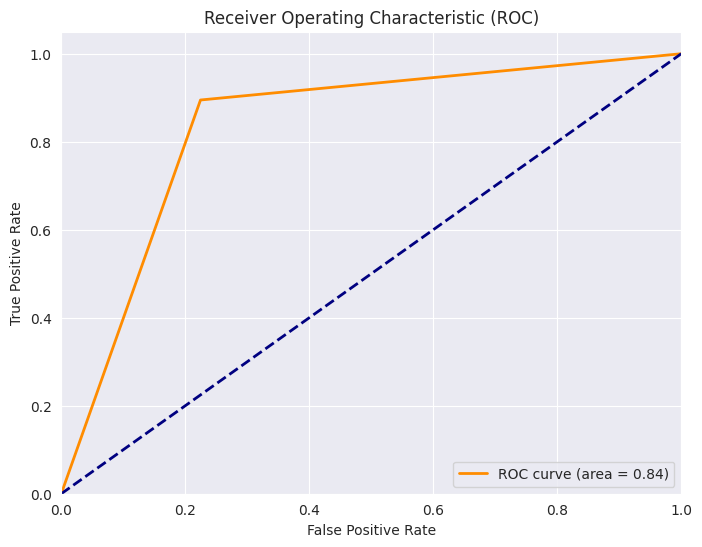

,Model,F1-Score,AUC-Score,Assessment
0,LogisticRegression,0.84,0.84,Overfitting


In [29]:
# Specify the model and its parameters
model_class = LogisticRegression
model_params = {'random_state': 42}

# Call the train_ml_model function
lr_result_df = train_ml_model(X_train_preprocessed,y_train,X_eval_preprocessed,y_eval, model_class, **model_params)
lr_result_df

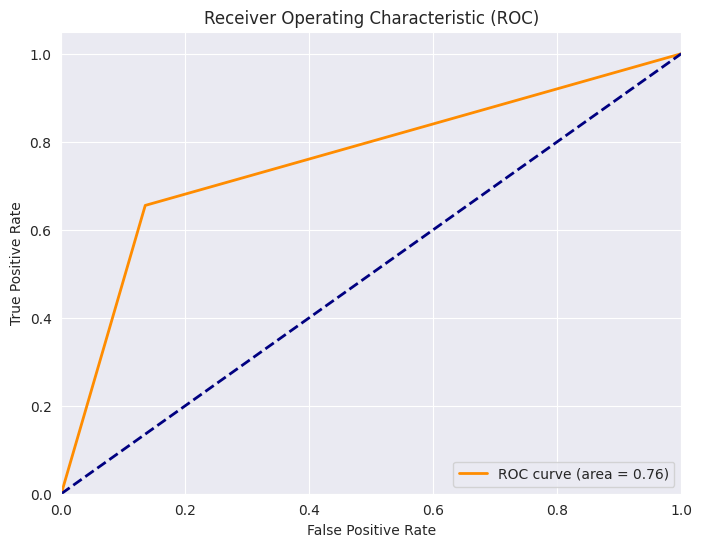

,Model,F1-Score,AUC-Score,Assessment
0,DecisionTreeClassifier,0.73,0.76,Overfitting


In [30]:
# Specify the model and its parameters
model_class = DecisionTreeClassifier
model_params = {'random_state': 42}

# Call the train_ml_model function
dt_result_df = train_ml_model(X_train_preprocessed,y_train,X_eval_preprocessed,y_eval, model_class, **model_params)
dt_result_df

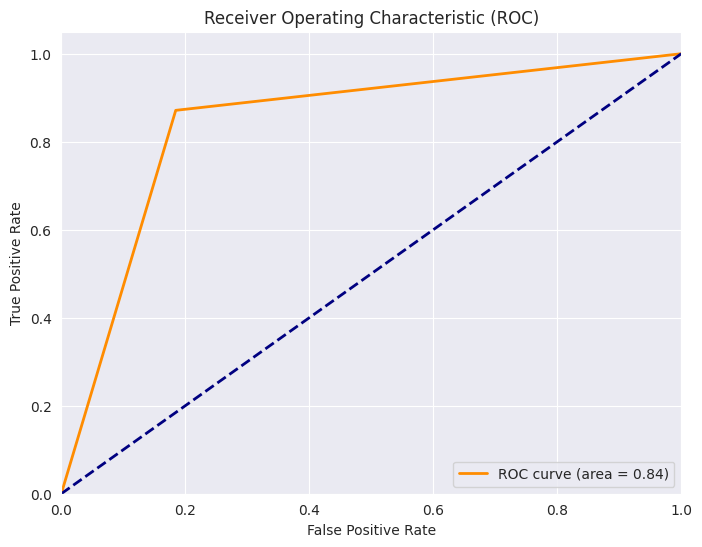

,Model,F1-Score,AUC-Score,Assessment
0,GradientBoostingClassifier,0.85,0.84,Overfitting


In [31]:
# Specify the model and its parameters
model_class = GradientBoostingClassifier
model_params = {'random_state': 42}

# Call the train_ml_model function
sgd_result_df = train_ml_model(X_train_preprocessed,y_train,X_eval_preprocessed,y_eval, model_class, **model_params)
sgd_result_df

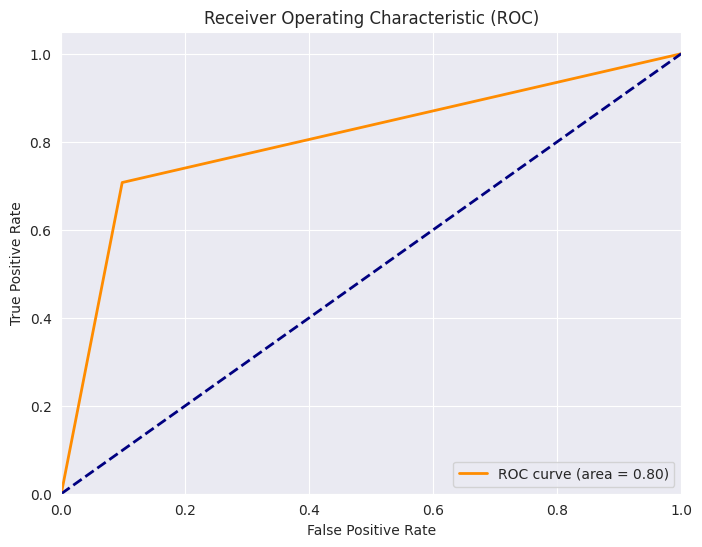

,Model,F1-Score,AUC-Score,Assessment
0,RandomForestClassifier,0.78,0.8,Overfitting


In [32]:
# Specify the model and its parameters
model_class = RandomForestClassifier
model_params = {'random_state': 42}

# Call the train_ml_model function
rf_result_df = train_ml_model(X_train_preprocessed,y_train,X_eval_preprocessed,y_eval, model_class, **model_params)
rf_result_df

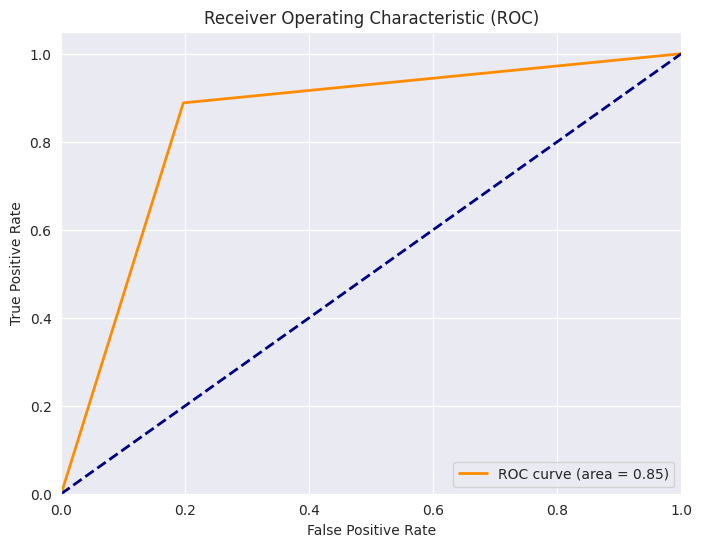

,Model,F1-Score,AUC-Score,Assessment
0,HistGradientBoostingClassifier,0.85,0.85,Overfitting


In [33]:
# Specify the model and its parameters
model_class = HistGradientBoostingClassifier
model_params = {'random_state': 42}

# Call the train_ml_model function
hgb_result_df = train_ml_model(X_train_preprocessed,y_train,X_eval_preprocessed,y_eval, model_class, **model_params)
hgb_result_df

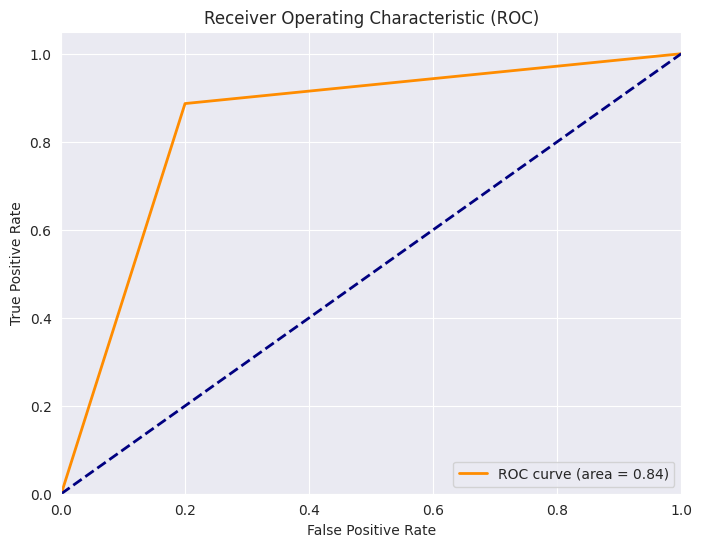

,Model,F1-Score,AUC-Score,Assessment
0,AdaBoostClassifier,0.85,0.84,Overfitting


In [34]:
# Specify the model and its parameters
model_class = AdaBoostClassifier
model_params = {'random_state': 42}

# Call the train_ml_model function
adb_result_df = train_ml_model(X_train_preprocessed,y_train,X_eval_preprocessed,y_eval, model_class, **model_params)
adb_result_df

### Models Comparison

In [35]:
results = {'model': ['Decision Tree', 'Random Forest', 'AdaBoost', 'Logistic Regression', 'HistGradientBoosting', 'GradientBoosting'],
           'f1_score': [dt_result_df['F1-Score'].iloc[0], rf_result_df['F1-Score'].iloc[0], lr_result_df['F1-Score'].iloc[0], hgb_result_df['F1-Score'].iloc[0], sgd_result_df['F1-Score'].iloc[0], adb_result_df['F1-Score'].iloc[0]],
           'AUC_score': [dt_result_df['AUC-Score'].iloc[0], rf_result_df['AUC-Score'].iloc[0], lr_result_df['AUC-Score'].iloc[0], hgb_result_df['AUC-Score'].iloc[0], sgd_result_df['AUC-Score'].iloc[0], adb_result_df['AUC-Score'].iloc[0]],
           'Assessment': [dt_result_df['Assessment'].iloc[0], rf_result_df['Assessment'].iloc[0], lr_result_df['Assessment'].iloc[0], hgb_result_df['Assessment'].iloc[0], sgd_result_df['Assessment'].iloc[0], adb_result_df['Assessment'].iloc[0]]
           }

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='AUC_score', ascending=False)
results_df

,model,f1_score,AUC_score,Assessment
3,Logistic Regression,0.85,0.85,Overfitting
2,AdaBoost,0.84,0.84,Overfitting
4,HistGradientBoosting,0.85,0.84,Overfitting
5,GradientBoosting,0.85,0.84,Overfitting
1,Random Forest,0.78,0.80,Overfitting
0,Decision Tree,0.73,0.76,Overfitting


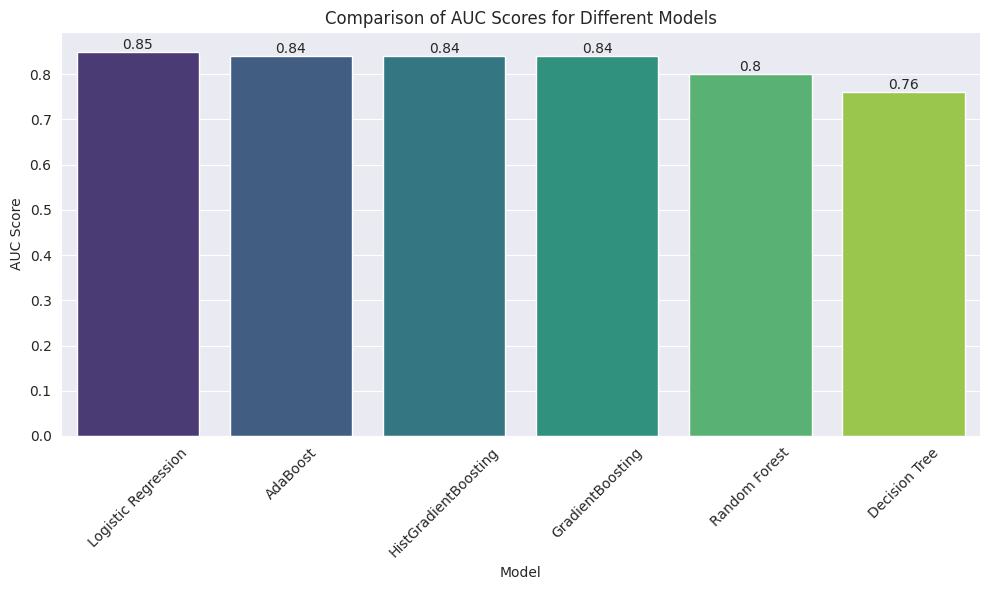

In [36]:
# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='model', y='AUC_score', palette='viridis')

# Add data labels
for i, value in enumerate(results_df['AUC_score']):
    plt.text(i, value, round(value, 2), ha='center', va='bottom')

# Set other plot properties
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.title('Comparison of AUC Scores for Different Models')
plt.tight_layout()
plt.show()

### Hyperparameter Tuning and Feature Importances

In [37]:
# Create Histogram Gradient Boosting model
model = LogisticRegression(random_state=42)
model.fit(X_sub_train_preprocessed, y_sub_train)


# Define the parameter grid for GridSearchCV
param_distribution = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['none', 11, 12],
    'C' : [100, 1.0, 0.01]
}

# Create a repeated stratified K-fold cross-validator
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Create GridSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions = param_distribution, n_jobs=-1, cv=cv, scoring='f1', error_score=0)
random_result = random_search.fit(X_sub_train_preprocessed, y_sub_train)

# Summarize results
print("Best Score: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best Score: 0.845030 using {'solver': 'lbfgs', 'penalty': 'none', 'C': 1.0}


In [39]:
best_model = LogisticRegression(solver='nlbfgs', penalty='none', C= 1.0, random_state=42)

In [40]:
# set the destination path to the "export" directory
destination = "."

# create a dictionary to store the objects and their filenames
models = {"preprocessor": preprocessor,
          "Final_model": best_model}

# loop through the models and save them using joblib.dump()
for name, model in models.items():
    dump(model, os.path.join(destination, f"{name}.joblib"))

In [41]:
!pip freeze > requirements.txt